# 01 - Introduction to Machine Learning

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 0.2, May 2016

## Part of the class [Machine Learning for Security Informatics](https://github.com/albahnsen/ML_SecurityInformatics)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Jake Vanderplas](http://www.vanderplas.com)

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. 

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

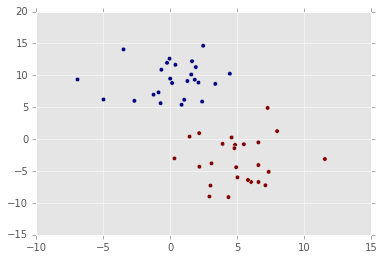

In [2]:
# Create a random set of examples
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,random_state=23, cluster_std=2.90)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [3]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [4]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

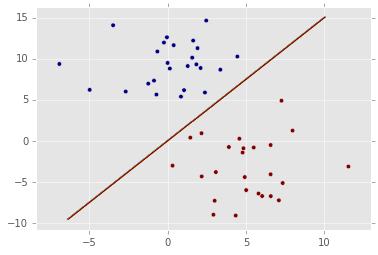

In [5]:
plt.contour(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

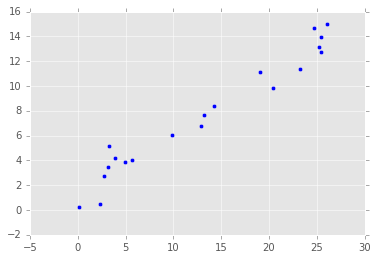

In [6]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# underscore at the end indicates a fit parameter
print(clf.coef_)
print(clf.intercept_)

[ 0.48162694]
1.33687374876


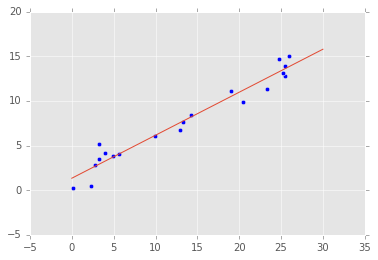

In [9]:
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new)

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

In [10]:
from IPython.core.display import Image, display

display(Image(url='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(url='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(url='images/iris_virginica.jpg'))
print("Iris Virginica")

display(Image(url='images/iris_with_length.png'))
print('Iris versicolor and the petal and sepal width and length')
print('From, Python Data Analytics, Apress, 2015.')

Iris Setosa



Iris Versicolor



Iris Virginica


Iris versicolor and the petal and sepal width and length
From, Python Data Analytics, Apress, 2015.


### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['target_names', 'target', 'DESCR', 'feature_names', 'data'])

In [12]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [13]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [14]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### Dimensionality Reduction: PCA

Principal Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

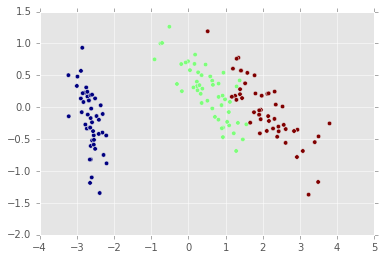

In [15]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

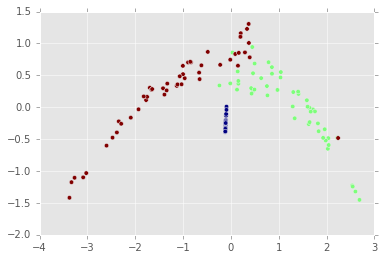

In [16]:
X, y = iris.data, iris.target
from sklearn.manifold import Isomap
pca = Isomap(n_components=3)
pca.fit(X)
X_reduced2 = pca.transform(X)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y)

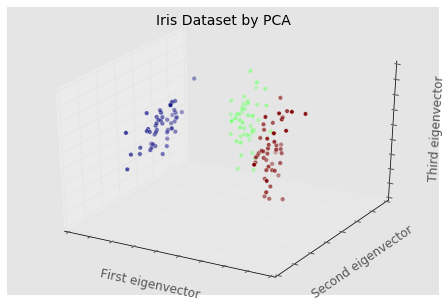

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=y)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

### Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

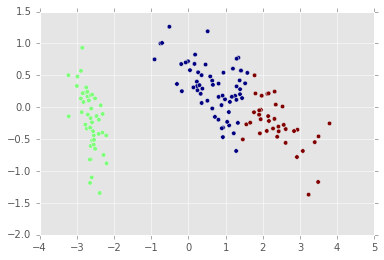

In [18]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

Lets then evaluate the performance of the clustering versus the ground truth

In [19]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print(cm)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

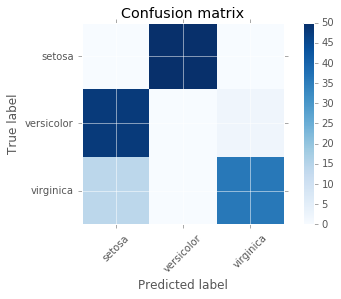

In [21]:
plt.figure()
plot_confusion_matrix(cm)

### Classification Logistic Regression

0.706666666667 0.6 0.6241 0.0152210015731


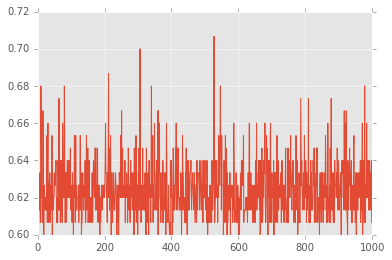

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import cross_validation

errors = []
for i in range(1000):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = (y_pred == y_test).sum()
    err = 1- acc / n_samples
    errors.append(err)

plt.plot(list(range(1000)), errors)

errors = np.array(errors)
print(errors.max(), errors.min(), errors.mean(), errors.std())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

errors = []
for i in range(1000):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = (y_pred == y_test).sum()
    err = 1- acc / n_samples
    errors.append(err)
plt.plot(list(range(1000)), errors)

errors = np.array(errors)
print(errors.max(), errors.min(), errors.mean(), errors.std())

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Flow Chart: How to Choose your Estimator

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

In [ ]:
from IPython.display import Image
Image(url="http://scikit-learn.org/dev/_static/ml_map.png")

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

# Machine Learning for Security Informatics

There are several applications of machine learning for security informatics



## Intrusion Detection

![Intrusion Detection](images/Header_IPS_Intrusion_Detection_01.jpg)

An Intrusion Detection System (IDS) is a software that monitors a single or a
network of computers for malicious activities (attacks) that are aimed at stealing
or censoring information or corrupting network protocols. Most techniques used
in today’s IDS are not able to deal with the dynamic and complex nature of cyber
attacks on computer networks. Hence, efficient adaptive methods like various
techniques of machine learning can result in higher detection rates, lower false
alarm rates and reasonable computation and communication costs.

![Intrusion Detection](images/download.jpg)

## Fraud Detection

Fraud detection is one of the earliest industrial applications of data mining and machine learning. 
Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. Therefore, model performance is measured by using account-level metrics, which will be discussed in detail later.
![fraud Detection](images/fraud.png)

## Phishing Detection

Phishing, by definition, is the
act of defrauding an online user in order to obtain personal information by posing as
a trustworthy institution or entity. Users usually have a hard time differentiating
between legitimate and malicious sites because they are made to look exactly the
same. Therefore, there is a need to create better tools to combat attackers.

![phishing Detection](images/detect_phishing_intro.jpg)

## Malware Classification

In recent years, the malware industry has become a well organized market involving large amounts of money. Well funded, multi-player syndicates invest heavily in technologies and capabilities built to evade traditional protection, requiring anti-malware vendors to develop counter mechanisms for finding and deactivating them. In the meantime, they inflict real financial and emotional pain to users of computer systems.

One of the major challenges that anti-malware faces today is the vast amounts of data and files which need to be evaluated for potential malicious intent. For example, Microsoft's real-time detection anti-malware products are present on over 160M computers worldwide and inspect over 700M computers monthly. This generates tens of millions of daily data points to be analyzed as potential malware. One of the main reasons for these high volumes of different files is the fact that, in order to evade detection, malware authors introduce polymorphism to the malicious components. This means that malicious files belonging to the same malware "family", with the same forms of malicious behavior, are constantly modified and/or obfuscated using various tactics, such that they look like many different files.
![malware Detection](images/malware.jpg)

## Man-in-the-Browser Attacks

Man-in-the-Browser (MITB) attacks are the most destructive threat on the Internet stealing money from customer accounts right
now. These attacks infect a webpage by taking advantage of security vulnerabilities in browsers and common web plugins,
modifying web pages and transactions as they are happening in real time. Cybercriminals launching an MITB attack can intercept
and change the content on a website by injecting new HTML code and then perform unauthorized transactions while a customer
has an online banking session open, but the client will only see the transaction performed as they intended on their screen. If the
customer checks the URL or SSL certificates of the transactional site, they will be the same. Even the most sophisticated security
professional may not know an incident is happening, because the entire point of an MITB attack is to mimic the page that malicious
code is being injected into as much as possible, so that the banking customer doesn't realize that something is amiss. 
![malware Detection](images/html_injection.png)